In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [41]:
data_calidad = pd.read_excel("Calidad del Agua Superficial a.xlsx")  #Ingresa la base de datos
print(data_calidad.head())

            CLAVE                                        SITIO  \
0  DLAGU0001RNL21                      PRESA NATILLAS DE ABAJO   
1  DLAGU0002RNL21                             PRESA EL JOCOQUI   
2  DLAGU0003RNL21                    BORDO SANTA ELENA CORTINA   
3  DLAGU0004RNL21  HUMEDAL BUENAVISA DE PEÑUELAS  CHARCA NO. 5   
4  DLAGU0005RNL21                            PRESA PEÑA BLANCA   

       ORGANISMO_DE_CUENCA          ESTADO        MUNICIPIO            CUENCA  \
0  LERMA SANTIAGO PACIFICO  AGUASCALIENTES            COSIO     RÍO SAN PEDRO   
1  LERMA SANTIAGO PACIFICO  AGUASCALIENTES  RINCÓN DE ROMOS     RÍO SAN PEDRO   
2  LERMA SANTIAGO PACIFICO  AGUASCALIENTES   AGUASCALIENTES  PRESA EL NIÁGARA   
3  LERMA SANTIAGO PACIFICO  AGUASCALIENTES   AGUASCALIENTES    PRESA AJOJUCAR   
4  LERMA SANTIAGO PACIFICO  AGUASCALIENTES         CALVILLO   RÍO JUCHIPILA 1   

            CUERPO DE AGUA     TIPO  SUBTIPO    LONGITUD  ...  CONTAMINANTES  \
0  PRESA NATILLAS DE ABAJO  LÉNTICO 

In [43]:
semaforo = data_calidad["SEMAFORO"].tolist() #Se saca la variable semaforo y se convierte a lista

In [55]:
values = []
values = [0 if value == "Verde" else (1 if value == "Amarillo" else 2) for value in semaforo]   #Se transforma de string categorico a categorico numerico

In [56]:
print(values)

[2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [57]:
data_calidad["SEMAFORO"] = values  #Se crea la nueva columna

In [58]:
data_por_estado = data_calidad.groupby(["ESTADO"]).sum() #Se agrupan los reportes negativos por estados

In [65]:
data_por_estado.head() #Se imprimen los primeros valores

,LONGITUD,LATITUD,PERIODO,OD_PORC_MED,SEMAFORO
ESTADO,,,,,
AGUASCALIENTES,-1126.916951,241.757758,22231,0.0,16
BAJA CALIFORNIA SUR,-2099.334462,463.858877,38399,192.7,8
BAJA CALIFORNIA2,-1856.424226,514.308717,32336,208.8,24
CAMPECHE,-90.516830,19.874220,2021,0.0,0
CHIAPAS,-5103.954719,918.833565,111155,1492.8,61


In [85]:
salud = pd.read_excel(r"/content/BIINEGI2060111430 1.xlsx") #Se lee la base de datos de reportes de salud

In [86]:
print(salud.head())

                Entidad  Salud autorreportada
0        aguascalientes                   8.5
1      baja california2                   8.6
2   baja california sur                   8.6
3              campeche                   8.3
4  coahuila de zaragoza                   8.6


In [87]:
data_semaforo = pd.DataFrame()  #Se obtienen los datos requeridos
#data_semaforo["Estado"] = data_por_estado.ESTADO
data_semaforo["Semaforo"] = data_por_estado["SEMAFORO"]

In [88]:
estados = [] 
for estado in data_por_estado.index:
  estados.append(estado)
data_semaforo["Estado"] = estados

In [89]:
estados_salud = salud.Entidad.tolist()
salud_autorreportada = salud["Salud autorreportada"].tolist()

In [110]:
estados_semaforo = [x.lower() for x in data_semaforo["Estado"].tolist()]
semaforo = data_semaforo["Semaforo"].tolist()
  

In [111]:
print(estados_semaforo)

['aguascalientes', 'baja california sur', 'baja california2', 'campeche', 'chiapas', 'chihuahua', 'coahuila de zaragoza', 'colima', 'distrito federal', 'durango', 'guanajuato', 'guerrero', 'hidalgo', 'jalisco', 'mexico', 'michoacan de ocampo', 'morelos', 'nayarit', 'nuevo leon', 'oaxaca', 'puebla', 'queretaro', 'quintana roo', 'san luis potosi', 'sinaloa', 'sonora', 'tabasco', 'tamaulipas', 'tlaxcala', 'veracruz de ignacio de la llave', 'yucatan', 'zacatecas']


In [118]:
semaforo_orden = [] #Se cambia el orden para que ambas bases de datos tengan el mismo orden y formato
salud_orden = []
for estado in range(len(estados_salud)):
  index_salud = estados_salud.index(estados_semaforo[estado])
  salud_orden.append(salud_autorreportada[index_salud])


0.0
0.0
0.0
0.0
-0.40000000000000036
-0.3999999999999986
0.40000000000000036
0.3999999999999986
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


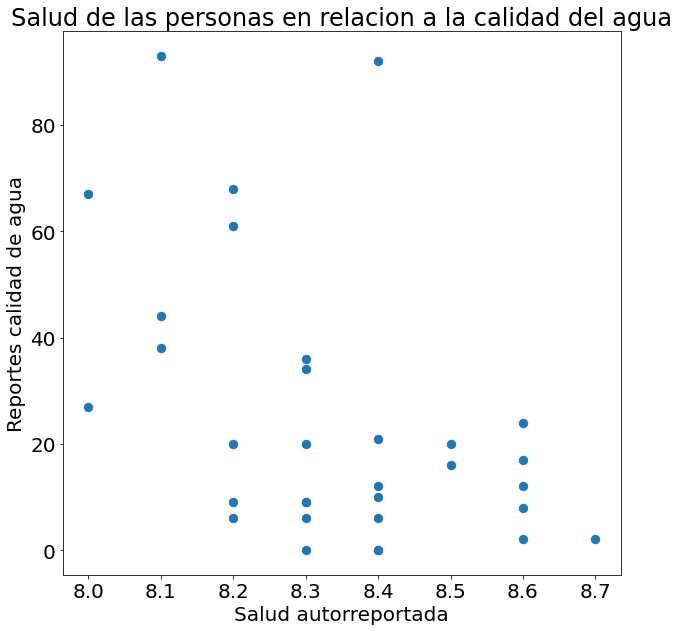

In [126]:
plt.rcParams.update({'font.size': 20}) #Se utiliza un scatterplot para ver el comportamiento de los datos
plt.figure(figsize=(10,10))
plt.scatter(salud_orden, semaforo, s = 70)
plt.xlabel("Salud autorreportada")
plt.ylabel("Reportes calidad de agua")
plt.title("Salud de las personas en relacion a la calidad del agua")
plt.show()

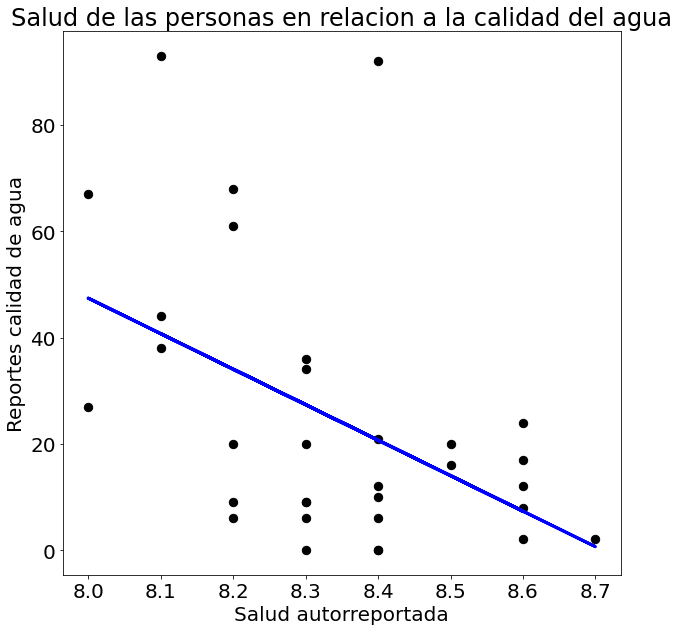

In [137]:
import matplotlib.pyplot as plt # Se utiliza sklearn para calcular una regresion lineal entre las variables
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X_train = [[x] for x in salud_orden]
y_train = [[y] for y in semaforo]

regr = linear_model.LinearRegression() # Se crea el objeto 


regr.fit(X_train, y_train) # Se entrena el modelo

plt.rcParams.update({'font.size': 20}) #Se imprime de nuevo con la linea de regresion
plt.figure(figsize=(10,10))
plt.scatter(salud_orden, semaforo, s = 70, color = "Black")
plt.xlabel("Salud autorreportada")
plt.ylabel("Reportes calidad de agua")
plt.title("Salud de las personas en relacion a la calidad del agua")
y_pred = regr.predict(X_train)
plt.plot(X_train, y_pred, color="blue", linewidth=3)

plt.show()

In [138]:
import pandas as pd

salud_cr = pd.Series(salud_orden) #Se convierten las listas a series de pandas
reportes_cr = pd.Series(semaforo)
 
corr = round(salud_cr.corr(reportes_cr), 4) #Se calcula la correlacion 
 
print('corr_gust :', corr)

corr_gust : -0.4784
